# Principal Component Analysis
Use PCA.csv file for sample analysis. 

Sample survey responses from 315 job applicants. 
Survey consists of 25 questions meant to measure 4 important qualities.
Motivation : Question3,4,5,6,7,8,12,13
Dependability : Question 2,14,15,16,17,18,19
Enthusiasm : Question 20,21,22,23,24,25
Commitment: Question 1,9,10,11

We will be using PCA to reduce dimension of the survey while maintaining the dimensions that explain the most variance.

Code examples modified from: https://www.datacamp.com/community/tutorials/introduction-factor-analysis


In [35]:
import sys
!{sys.executable} -m pip install factor_analyzer

Looking in indexes: https://repo-depot.t1.tbs-sct.gc.ca/pypi/simple


In [47]:
import pandas as pd
from pandas.plotting import scatter_matrix
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize']= [15,15]

df=pd.read_csv('PCA.csv')

df

,Qu1,Qu2,Qu3,Qu4,Qu5,Qu6,Qu7,Qu8,Qu9,Qu10,...,Qu16,Qu17,Qu18,Qu19,Qu20,Qu21,Qu22,Qu23,Qu24,Qu25
0,3,4,4,4,4,4,4,4,3,4,...,4,4,4,3,4,4,4,4,4,4
1,6,1,2,2,2,3,3,3,3,3,...,2,2,3,1,2,1,3,1,2,1
2,5,2,3,2,3,3,2,3,5,5,...,3,3,2,2,3,3,3,3,3,3
3,4,6,2,6,5,6,5,6,4,6,...,4,4,3,6,5,2,3,3,2,3
4,4,6,2,6,5,6,5,6,4,6,...,4,4,3,6,5,2,3,3,2,3
5,6,6,3,3,3,3,2,3,6,6,...,5,3,3,6,5,1,3,4,2,3
6,6,3,2,3,2,3,4,4,5,5,...,3,4,4,4,4,3,3,3,4,4
7,5,2,3,3,3,4,4,5,4,6,...,4,4,4,4,4,5,4,4,4,4
8,6,6,3,3,3,3,2,3,6,6,...,5,3,3,6,5,2,3,4,2,3
9,6,3,2,3,2,3,4,4,5,5,...,3,4,4,4,4,4,3,3,4,4


Check the data for linearity by using a correlation matrix 

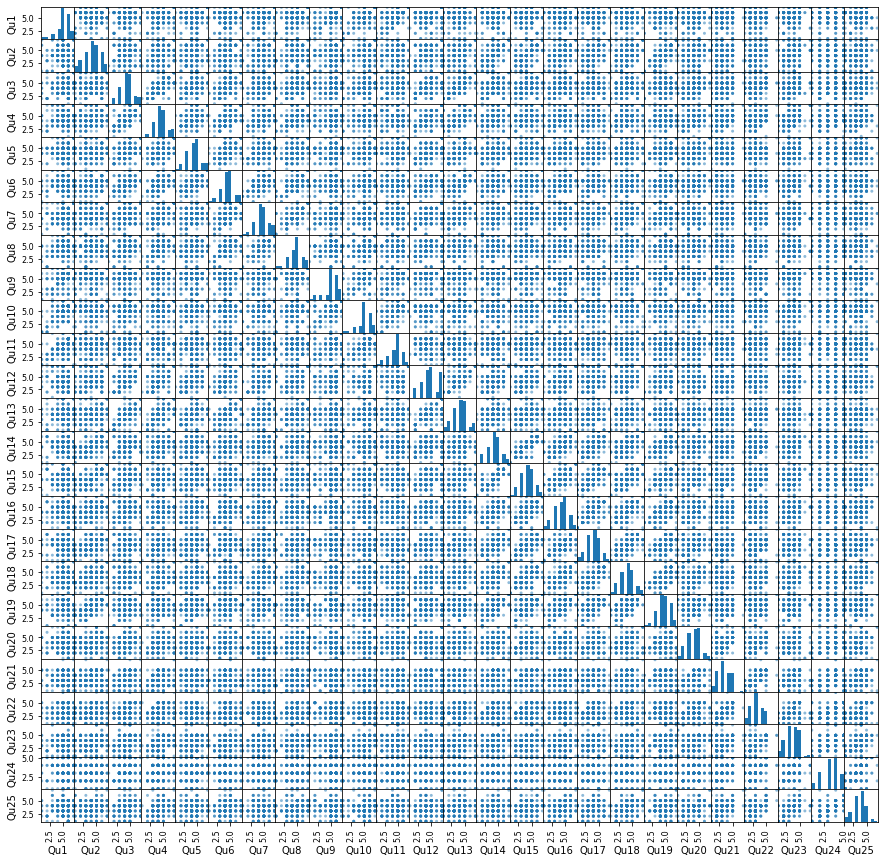

In [26]:
scatter_matrix(df)
plt.show()

Or check linearity by checking linear correlation.
Each variable should have a correlation of at least 0.3 with another variable


In [28]:
correlation= df.corr()
correlation.style.background_gradient(cmap='coolwarm').set_precision(2)

,Qu1,Qu2,Qu3,Qu4,Qu5,Qu6,Qu7,Qu8,Qu9,Qu10,Qu11,Qu12,Qu13,Qu14,Qu15,Qu16,Qu17,Qu18,Qu19,Qu20,Qu21,Qu22,Qu23,Qu24,Qu25
Qu1,1,0.041,0.22,0.14,0.12,0.11,0.14,0.26,0.49,0.58,0.55,0.15,0.13,-0.0015,-0.0024,0.06,-0.028,0.043,0.061,0.012,-0.081,-0.027,0.1,-0.084,-0.016
Qu2,0.041,1,0.16,0.23,0.16,0.23,0.12,0.1,0.15,0.082,0.058,0.25,0.18,0.63,0.55,0.38,0.42,0.35,0.68,0.12,0.049,0.084,0.22,-0.032,0.13
Qu3,0.22,0.16,1,0.68,0.47,0.52,0.36,0.39,0.23,0.26,0.15,0.58,0.69,0.31,0.28,0.22,0.18,0.22,0.15,0.21,0.16,0.18,0.22,0.088,0.15
Qu4,0.14,0.23,0.68,1,0.49,0.53,0.43,0.46,0.2,0.21,0.047,0.54,0.56,0.24,0.24,0.24,0.17,0.19,0.17,0.25,0.19,0.2,0.35,0.15,0.25
Qu5,0.12,0.16,0.47,0.49,1,0.51,0.35,0.3,0.16,0.2,0.071,0.53,0.44,0.23,0.22,0.28,0.23,0.23,0.22,0.17,0.09,0.065,0.21,0.097,0.13
Qu6,0.11,0.23,0.52,0.53,0.51,1,0.47,0.49,0.21,0.31,0.065,0.5,0.56,0.29,0.27,0.36,0.2,0.2,0.23,0.18,0.026,0.057,0.19,0.014,0.11
Qu7,0.14,0.12,0.36,0.43,0.35,0.47,1,0.63,0.25,0.24,0.11,0.48,0.41,0.22,0.24,0.27,0.2,0.27,0.2,0.069,0.028,0.029,0.12,-0.053,0.064
Qu8,0.26,0.1,0.39,0.46,0.3,0.49,0.63,1,0.22,0.34,0.2,0.4,0.34,0.095,0.12,0.18,0.086,0.21,0.17,0.18,0.081,0.076,0.17,0.019,0.16
Qu9,0.49,0.15,0.23,0.2,0.16,0.21,0.25,0.22,1,0.55,0.4,0.27,0.21,0.13,0.093,0.11,-0.018,0.12,0.22,-0.077,-0.19,-0.11,0.053,-0.17,-0.069
Qu10,0.58,0.082,0.26,0.21,0.2,0.31,0.24,0.34,0.55,1,0.6,0.17,0.22,0.023,-0.0049,0.079,-0.04,0.025,0.11,0.096,-0.12,0.0047,0.25,-0.028,0.097


We don't need to drop any variables, so we can continue with our analysis.
Next we will check suitability of data for factor analysis using bartlett and KMO 

In [40]:
chi, p = calculate_bartlett_sphericity(df)

kmo_all, kmo_value= calculate_kmo(df)

print('Sphericity p-value: ', p)
print('KMO Value: ', kmo_value)
print('All KMO values:', kmo_all)

Sphericity p-value:  0.0
KMO Value:  0.8316607599731853
All KMO values: [0.81593053 0.73871853 0.85271102 0.88880858 0.90865846 0.9049673
 0.84208508 0.82827514 0.84855419 0.76100945 0.74251152 0.89835236
 0.85603134 0.82356014 0.87619255 0.91271626 0.87981244 0.79281741
 0.80228084 0.83296877 0.72419284 0.72301207 0.82988772 0.73982739
 0.80241796]


Now that tests are satisfied, we can continue with the analysis. 
We will check for number of components using eigen values.
Start with the same number of components as variables

In [73]:
factor= FactorAnalyzer(25,rotation=None)
factor.fit(df)
eigen_values,common_values= factor.get_eigenvalues()
factor_var, prop_var, cumm_var= factor.get_factor_variance()
#eigen_values
#prop_var
eigen_var_table=np.column_stack((eigen_values,prop_var))
eigen_table= pd.DataFrame(np.round(eigen_var_table, 2),columns=['Eigenvalue', 'Variance'])
eigen_table

,Eigenvalue,Variance
0,6.73,0.26
1,3.34,0.12
2,2.90,0.11
3,2.02,0.07
4,1.05,0.04
5,0.95,0.03
6,0.89,0.02
7,0.77,0.02
8,0.69,0.02
9,0.63,0.01


Now let's try a scree plot to verify that the first 5 components should be retained

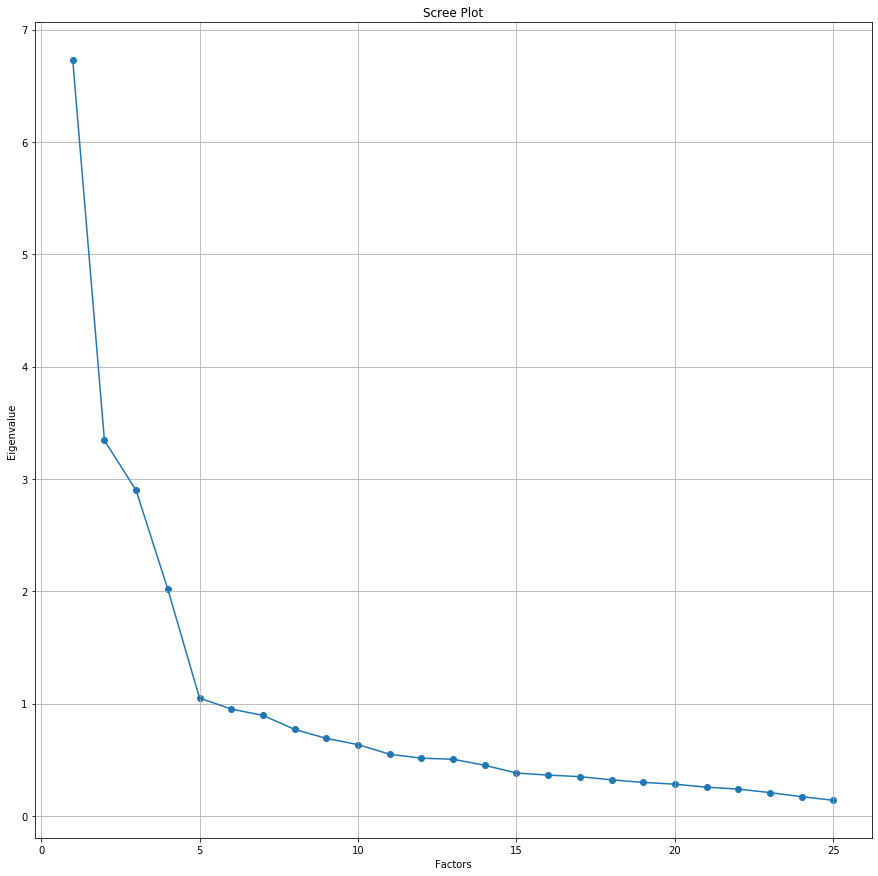

In [75]:
plt.scatter(range(1,df.shape[1]+1),eigen_values)
plt.plot(range(1,df.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Scree plot shows approx. 4 components should be retained

In [95]:
five_factor=FactorAnalyzer(5, rotation="varimax")
five_factor.fit(df)
temp= (np.round(five_factor.loadings_,1))
loading_table= pd.DataFrame(np.where(temp<0.3, '', temp))
loading_table


,0,1,2,3,4
0,,,,0.7,
1,,0.7,,,
2,0.8,,,,
3,0.7,,,,
4,0.6,,,,
5,0.7,,,,
6,0.6,,,,0.3
7,0.6,,,,0.3
8,,,,0.6,
9,,,,0.8,


In [98]:
four_factor=FactorAnalyzer(4, rotation="varimax")
four_factor.fit(df)
temp= (np.round(four_factor.loadings_,2))
loading_table= pd.DataFrame(np.where(temp<0.3, '', temp))
loading_table

,0,1,2,3
0,,,,0.71
1,,0.66,,
2,0.75,,,
3,0.74,,,
4,0.59,,,
5,0.7,,,
6,0.58,,,
7,0.55,,,
8,,,,0.6
9,,,,0.82


For interpretability, it is clear that 4 components should be retained.

# CRONBACH's ALPHA

In [114]:
#source https://github.com/statsmodels/statsmodels/issues/1272
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    calpha = nitems / float(nitems-1) * (1 - itemvars.sum() / float(tscores.var(ddof=1)))

    return calpha


In [121]:
enthusiasm= df.iloc[:,19:26]
cronbach= CronbachAlpha(enthusiasm)
print('Cronbach Alpa for Enthusiasm (Q20-25):' , cronbach)

Cronbach Alpa for Enthusiasm (Q20-25): 0.8229503448603808
